In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Layer

In [ ]:
# Hyper-parameters
batch_size = 64
latent_len = 2

# Part 1: Load data

In [ ]:
# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = np.round(x_train.astype('float32') / 255.)
x_test  = np.round(x_test.astype('float32')  / 255.)

x_train = x_train.reshape((x_train.shape[0], -1))
x_test  = x_test.reshape((x_test.shape[0], -1))

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

11490434/11490434 [==============================] - 2s 0us/step
(60000, 784)
(60000,)
(10000, 784)
(10000,)


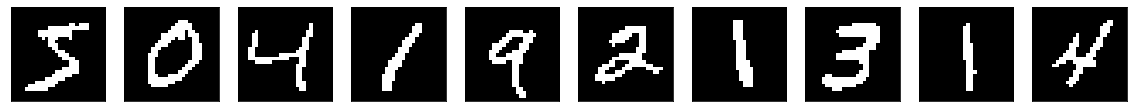

In [ ]:
# Show a few examples
plt.figure(figsize=(20, 4))
for i in range(10):
  ax = plt.subplot(1, 10, i + 1)
  plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

# Part 2: Regular AE

In [ ]:
# Define encoder
i = Input(shape=(784))
h = Dense(1024, activation='relu')(i)
l = Dense(2, activation='relu', name='latent')(h)

enc = Model(i, l)
enc.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_6 (Dense)             (None, 1024)              803840    
                                                                 
 latent (Dense)              (None, 2)                 2050      
                                                                 
Total params: 805,890
Trainable params: 805,890
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Define decoder
i_d = Input(shape=(2))
h_d = Dense(1024, activation='relu')(i_d)
o_d = Dense(784, activation='sigmoid')(h_d)

dec = Model(i_d, o_d)
dec.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_7 (Dense)             (None, 1024)              3072      
                                                                 
 dense_8 (Dense)             (None, 784)               803600    
                                                                 
Total params: 806,672
Trainable params: 806,672
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Define full AE
o = dec(enc(i))
ae = Model(i, o)
ae.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 784)]             0         
                                                                 
 model_6 (Functional)        (None, 2)                 805890    
                                                                 
 model_7 (Functional)        (None, 784)               806672    
                                                                 
Total params: 1,612,562
Trainable params: 1,612,562
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile and train
ae.compile(optimizer='adam', loss='bce')
history = ae.fit(x_train, x_train, epochs=50, batch_size=batch_size, validation_split=0.1)

Epoch 1/50
844/844 [==============================] - 5s 4ms/step - loss: 0.2424 - val_loss: 0.2065
Epoch 2/50
844/844 [==============================] - 3s 4ms/step - loss: 0.2012 - val_loss: 0.1955
Epoch 3/50
844/844 [==============================] - 4s 4ms/step - loss: 0.1937 - val_loss: 0.1903
Epoch 4/50
844/844 [==============================] - 4s 4ms/step - loss: 0.1894 - val_loss: 0.1867
Epoch 5/50
844/844 [==============================] - 3s 4ms/step - loss: 0.1865 - val_loss: 0.1850
Epoch 6/50
844/844 [==============================] - 3s 4ms/step - loss: 0.1843 - val_loss: 0.1828
Epoch 7/50
844/844 [==============================] - 4s 5ms/step - loss: 0.1824 - val_loss: 0.1815
Epoch 8/50
844/844 [==============================] - 3s 4ms/step - loss: 0.1809 - val_loss: 0.1807
Epoch 9/50
844/844 [==============================] - 3s 4ms/step - loss: 0.1796 - val_loss: 0.1793
Epoch 10/50
844/844 [==============================] - 3s 4ms/step - loss: 0.1784 - val_loss: 0.1787

313/313 [==============================] - 0s 1ms/step


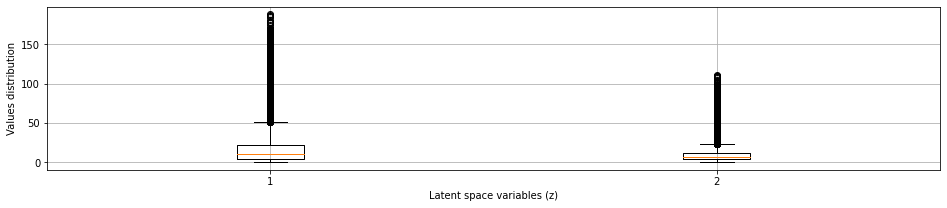

In [ ]:
# Plot distribution of latent space
z_ae = enc.predict(x_test)

plt.figure(figsize=(16, 3))
plt.boxplot(z_ae)
plt.xlabel('Latent space variables (z)')
plt.ylabel('Values distribution')
plt.grid()
plt.show()

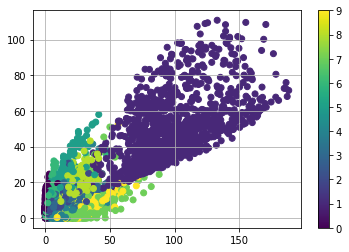

In [ ]:
# Plot latent space in 2-D "regular AE"
plt.figure(figsize=(6, 4))
plt.scatter(z_ae[:, 0], z_ae[:, 1], c=y_test)
plt.colorbar()
plt.grid()
plt.show()

[21.669123 11.978712]


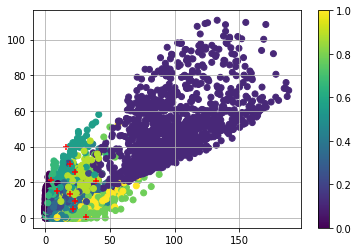

In [ ]:
# Generate random points within the distribution of Z
z_means = z_ae.mean(axis=0)
print(z_means)

z_samples = np.zeros((10, latent_len))
for z_ind in range(latent_len):
  z_samples[:, z_ind] = np.random.normal(loc=z_means[z_ind], scale=10, size=(10))

plt.figure(figsize=(6, 4))
plt.scatter(z_ae[:, 0], z_ae[:, 1], c=y_test)
plt.scatter(z_samples[:, 0], z_samples[:, 1], c='r', marker='+')
plt.colorbar()
plt.grid()
plt.show()

1/1 [==============================] - 0s 30ms/step


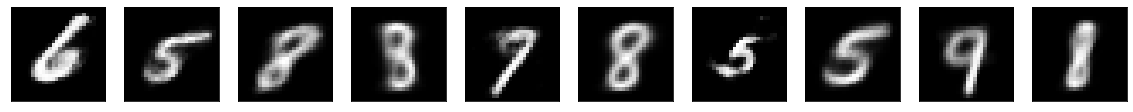

In [ ]:
# Generate synthetic data
x_hat_samples = dec.predict(z_samples)

# Show a few reconstruction from random samples
plt.figure(figsize=(20, 3))
for i in range(10):
    ax = plt.subplot(1, 10, i + 1)
    plt.imshow(x_hat_samples[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Part 3: Variational AE

In [ ]:
# AUX function -- Sampler
def sample_z(args):
  z_mean, z_log_var = args
  batch = tf.shape(z_mean)[0]
  dim = tf.shape(z_mean)[1]
  epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
  return z_mean + tf.exp(0.5 * z_log_var) * epsilon

In [ ]:
# Q(z|x) -- Define encoder
in_layer = Input(shape=(784), name='INPUT')
h_q = Dense(1024, activation='relu', name='H_Q')(in_layer)

# Mean and standard deviation
mu = Dense(latent_len, activation='linear', name='MU')(h_q)
log_sigma = Dense(latent_len, activation='linear', name='SIGMA')(h_q)

In [ ]:
# z ~ Q(z|X) -- Latent sample
z = Lambda(sample_z, name='Z')([mu, log_sigma])

In [ ]:
# final encoder
encoder = Model(in_layer, [mu, log_sigma, z], name='ENCODER')
encoder.summary()

Model: "ENCODER"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 INPUT (InputLayer)             [(None, 784)]        0           []                               
                                                                                                  
 H_Q (Dense)                    (None, 1024)         803840      ['INPUT[0][0]']                  
                                                                                                  
 MU (Dense)                     (None, 2)            2050        ['H_Q[0][0]']                    
                                                                                                  
 SIGMA (Dense)                  (None, 2)            2050        ['H_Q[0][0]']                    
                                                                                            

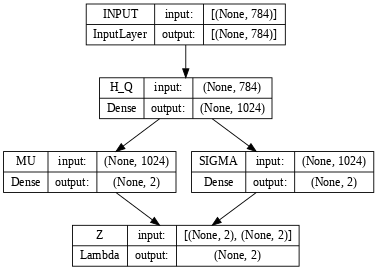

In [ ]:
# Plot model
plot_model(encoder, show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True, dpi=64)

In [ ]:
# P(x|z) -- Define decoder
decode_in_layer = Input(shape=(latent_len), name='IN_DECOD')
decode_hidden = Dense(1024, activation='relu', name='H_P')(decode_in_layer)
decode_out_layer = Dense(784, activation='sigmoid', name='OUT')(decode_hidden)

decoder = Model(decode_in_layer, decode_out_layer, name='DECODER')
decoder.summary()

Model: "DECODER"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 IN_DECOD (InputLayer)       [(None, 2)]               0         
                                                                 
 H_P (Dense)                 (None, 1024)              3072      
                                                                 
 OUT (Dense)                 (None, 784)               803600    
                                                                 
Total params: 806,672
Trainable params: 806,672
Non-trainable params: 0
_________________________________________________________________


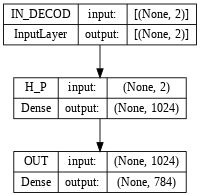

In [ ]:
# Plot model
plot_model(decoder, show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True, dpi=64)

In [ ]:
# Create full Variational Autoencoder
out_layer = decoder(encoder(in_layer)[2])
vae = Model(in_layer, out_layer, name='VAE')
vae.summary()

Model: "VAE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 INPUT (InputLayer)          [(None, 784)]             0         
                                                                 
 ENCODER (Functional)        [(None, 2),               807940    
                              (None, 2),                         
                              (None, 2)]                         
                                                                 
 DECODER (Functional)        (None, 784)               806672    
                                                                 
Total params: 1,614,612
Trainable params: 1,614,612
Non-trainable params: 0
_________________________________________________________________


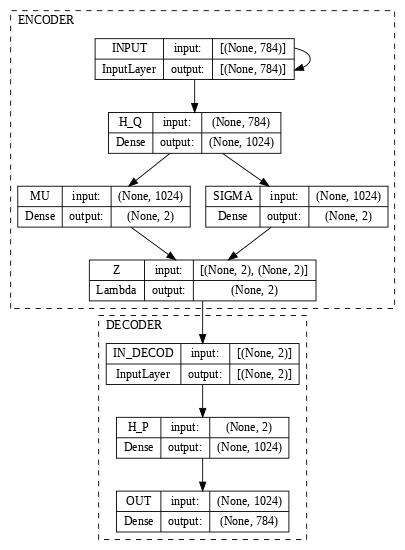

In [ ]:
# Plot model
plot_model(vae, show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True, dpi=64)

In [ ]:
# AUX -- VAE custom loss (DKL + BCE)
def vae_loss(x, x_hat):
  '''
  '''
  z_mean, z_log_var, z = encoder(x)
  reconstruction_loss = tf.reduce_mean(tf.reduce_sum(
      tf.keras.losses.binary_crossentropy(x, x_hat)
      ))
  kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
  kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss))
  return reconstruction_loss + 3e-4 * kl_loss

In [ ]:
# Compile and train
vae.compile(optimizer='adam', loss=vae_loss)
history = vae.fit(x_train, x_train, epochs=50, batch_size=batch_size, validation_split=0.1)

Epoch 1/50
844/844 [==============================] - 6s 5ms/step - loss: 11.7008 - val_loss: 11.8066
Epoch 2/50
844/844 [==============================] - 4s 5ms/step - loss: 11.2272 - val_loss: 11.6772
Epoch 3/50
844/844 [==============================] - 4s 5ms/step - loss: 11.0945 - val_loss: 11.5960
Epoch 4/50
844/844 [==============================] - 4s 4ms/step - loss: 11.0145 - val_loss: 11.5575
Epoch 5/50
844/844 [==============================] - 4s 4ms/step - loss: 10.9533 - val_loss: 11.5328
Epoch 6/50
844/844 [==============================] - 4s 5ms/step - loss: 10.9146 - val_loss: 11.5055
Epoch 7/50
844/844 [==============================] - 4s 4ms/step - loss: 10.8766 - val_loss: 11.4620
Epoch 8/50
844/844 [==============================] - 4s 5ms/step - loss: 10.8447 - val_loss: 11.4452
Epoch 9/50
844/844 [==============================] - 4s 5ms/step - loss: 10.8123 - val_loss: 11.4495
Epoch 10/50
844/844 [==============================] - 4s 4ms/step - loss: 10.7923

313/313 [==============================] - 0s 2ms/step


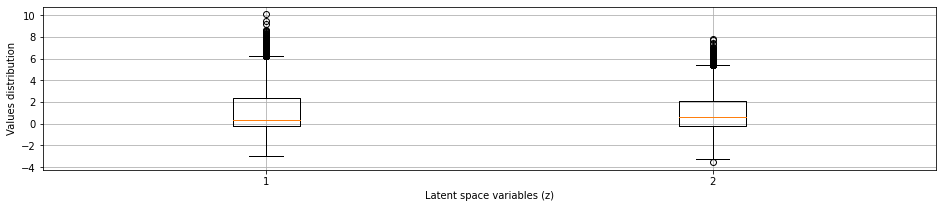

In [ ]:
# Plot distribution of latent space
z_vae = encoder.predict(x_test)[2]

plt.figure(figsize=(16, 3))
plt.boxplot(z_vae)
plt.xlabel('Latent space variables (z)')
plt.ylabel('Values distribution')
plt.grid()
plt.show()

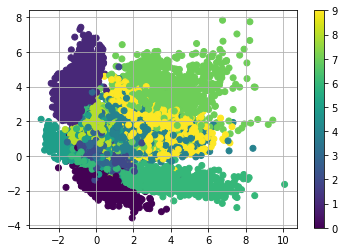

In [ ]:
# Plot latent space in 2-D "regular AE"
plt.figure(figsize=(6, 4))
plt.scatter(z_vae[:, 0], z_vae[:, 1], c=y_test)
plt.colorbar()
plt.grid()
plt.show()

[1.0974325 1.0057545]


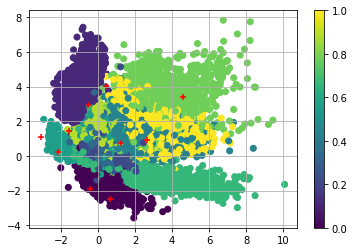

In [ ]:
# Generate random points within the distribution of Z
z_means = z_vae.mean(axis=0)
print(z_means)

z_samples = np.zeros((10, latent_len))
for z_ind in range(latent_len):
  z_samples[:, z_ind] = np.random.normal(loc=z_means[z_ind], scale=2, size=(10))

plt.figure(figsize=(6, 4))
plt.scatter(z_vae[:, 0], z_vae[:, 1], c=y_test)
plt.scatter(z_samples[:, 0], z_samples[:, 1], c='r', marker='+')
plt.colorbar()
plt.grid()
plt.show()

1/1 [==============================] - 0s 22ms/step


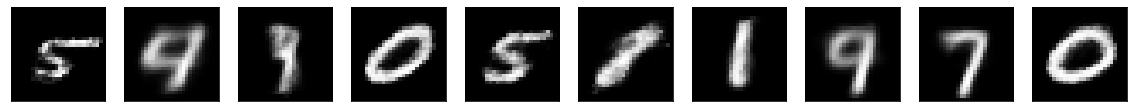

In [ ]:
# Generate synthetic data
x_hat_samples = decoder.predict(z_samples)

# Show a few reconstruction from random samples
plt.figure(figsize=(20, 3))
for i in range(10):
    ax = plt.subplot(1, 10, i + 1)
    plt.imshow(x_hat_samples[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()